In [1]:
## tools
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)


arxiv


In [2]:
arxiv.invoke('Attention is all you need')

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [3]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)


wikipedia


In [5]:
arxiv.invoke('What is the latest research in quantum computing?')

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY']=os.environ['GROQ_API_KEY']
os.environ['TAVILY_API_KEY']=os.environ['TAVILY_API_KEY']

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily=TavilySearchResults()
tavily.invoke('Provide me the recent AI news?')

/tmp/ipykernel_85971/640512692.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


[{'title': 'The latest AI news we announced in August',
  'url': 'https://blog.google/technology/ai/google-ai-updates-august-2025/',
  'content': "From Google's labs, AI news takes flight,\nWith updates shared for all to see the light.\nNew search modes bloom, with agents at your call,\nAnd Pixel's power answers every thrall.\n\nDeepMind's creations, images so grand,\nWhile students learn, with AI close at hand.\nNew coding tools, for tasks both big and small,\nAnd Genie's world, where dreams can enthrall. [...] Google made many AI advancements in August. You can now use AI Mode in Search in more countries and Deep Think in the Gemini app. Google also released new Pixel hardware with advanced AI features and made AI learning tools free for college students.\n\nSummaries were generated by Google AI. Generative AI is experimental.\n\n## Shakespeare-ish [...] For more than 20 years, we’ve invested in machine learning and AI research, tools and infrastructure to build products that make ev

In [10]:
## combining all these tools in the list
tools=[arxiv,wiki,tavily]

## Initialize the LLM Model
from langchain_groq import ChatGroq
llm=ChatGroq(model='openai/gpt-oss-20b')
llm.invoke('What is AI?')

AIMessage(content='**Artificial Intelligence (AI)** is the branch of computer science—and increasingly, interdisciplinary research—that seeks to create systems capable of performing tasks that, when done by humans, are considered to require “intelligence.” These tasks include reasoning, learning, problem‑solving, perception, language understanding, and decision making.\n\n---\n\n### Core Elements\n\n| Element | What it means | Typical techniques |\n|---------|---------------|---------------------|\n| **Representation** | How knowledge is encoded (rules, graphs, neural nets) | Symbolic logic, knowledge graphs |\n| **Inference** | Drawing conclusions from data | Logic engines, probabilistic models |\n| **Learning** | Improving performance from experience | Supervised, unsupervised, reinforcement learning |\n| **Perception** | Interpreting sensory input | Computer vision, speech recognition |\n| **Action** | Acting in an environment | Robotics, autonomous agents |\n\n---\n\n### Types of A

In [11]:
llm_with_tools=llm.bind_tools(tools=tools)
## EXecute the call
llm_with_tools.invoke('What is the recent news on AI?')

AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "What is the recent news on AI?" They want recent news. We need to browse. Use tavily_search_results_json.', 'tool_calls': [{'id': 'fc_573bea9c-6bed-4e46-9161-bc24cfc9d787', 'function': {'arguments': '{"query":"recent news on AI 2025"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 246, 'total_tokens': 310, 'completion_time': 0.063199677, 'prompt_time': 0.011885635, 'queue_time': 0.087455715, 'total_time': 0.075085312}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2078521c-9e3f-4e2f-8e02-7e1f2924808d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI 2025'}, 'id': 'fc_573bea9c-6bed-4e46-9161-bc24cfc9d787', 'type': 'tool_call'}], usage_metadata={'input_tokens': 

In [14]:
llm_with_tools.invoke('Find the three most recent Arxiv papers on quantum error correction.')

AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to query arxiv. Use functions.arxiv. Probably query "quantum error correction" with recent. Let\'s search.', 'tool_calls': [{'id': 'fc_f6772780-c341-4651-9531-ecb06afe7f21', 'function': {'arguments': '{"query":"quantum error correction site:arxiv.org"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 251, 'total_tokens': 309, 'completion_time': 0.058810557, 'prompt_time': 0.012253665, 'queue_time': 0.086583814, 'total_time': 0.071064222}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_c5a89987dc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d3e9ce7c-63c7-4cee-b184-59e88572dce9-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum error correction site:arxiv.org'}, 'id': 'fc_f6772780-c341-4651-9531-ecb06afe7f21', 'type': 'tool_call'}], usage_metadata={'input_tokens': 251, 'output_to

In [15]:
llm_with_tools.invoke('What are the latest academic findings regarding quantum computing?')

AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks: "What are the latest academic findings regarding quantum computing?" They want up-to-date academic findings. Need to browse. Use search.', 'tool_calls': [{'id': 'fc_92fa531c-8bf9-4b1a-856e-8b8e49eaccbc', 'function': {'arguments': '{"query":"latest academic findings quantum computing 2025"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 248, 'total_tokens': 312, 'completion_time': 0.064766572, 'prompt_time': 0.012157578, 'queue_time': 0.087018921, 'total_time': 0.07692415}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0fc17df3-5d75-4ba5-bb95-f6ab20434208-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest academic findings quantum computing 2025'}, 'id': 'fc_92fa531c-8bf9-4b1a-

In [13]:
llm_with_tools.invoke('What is machine learning?')

AIMessage(content='**Machine learning (ML)** is a subset of artificial intelligence that focuses on building systems that can learn from data, identify patterns, and make decisions with minimal human intervention. Instead of programming explicit rules for every possible scenario, a machine‑learning model is trained on examples, learns the underlying structure, and then generalizes to new, unseen data.\n\n---\n\n### Core Ideas\n\n| Concept | What it means |\n|---------|---------------|\n| **Data** | The raw material—images, text, numbers, sensor readings, etc. |\n| **Model** | A mathematical representation (e.g., a neural network, decision tree, support vector machine) that maps inputs to outputs. |\n| **Training** | The process of adjusting the model’s internal parameters so that its predictions match the known outcomes in a labeled dataset. |\n| **Loss / Objective Function** | A measure of how far the model’s predictions are from the true values; training seeks to minimize this loss. 

In [17]:
## langgraph app
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ##Human or AI Message
from typing import Annotated
from langgraph.graph.message import add_messages ## REducers in langgrph
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]


def tool_calling_llm(state:State):
    return {'messages':llm_with_tools.invoke(state['messages'])}

## build graph
builder=StateGraph(State)
builder.add_node('tool_calling_llm',tool_calling_llm)
builder.add_node('tools',ToolNode(tools))


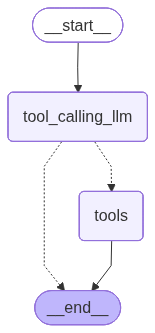

In [18]:
## Edges
builder.add_edge(START,'tool_calling_llm')
## if latest message (result) from assistant is a tool call -> tools condition routes to tools
## if the latest message (result) from assistant is not a tool call -> tools_condition routes to End
builder.add_conditional_edges('tool_calling_llm',tools_condition)
builder.add_edge('tools',END)

graph_builder=builder.compile()

## View the graph#
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [20]:
from langchain_core.messages import HumanMessage

messages=graph_builder.invoke({'messages':HumanMessage(content='1706.03762')})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_d8977b3f-1af1-4065-94f1-22e534e9bc2d)
 Call ID: fc_d8977b3f-1af1-4065-94f1-22e534e9bc2d
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base
